In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

## Import data

In [3]:
trump = pd.read_json('data/trump.json')

In [4]:
trump.shape

(38397, 21)

In [5]:
trump.columns

Index(['has_media', 'hashtags', 'img_urls', 'is_replied', 'is_reply_to',
       'likes', 'links', 'parent_tweet_id', 'replies', 'reply_to_users',
       'retweets', 'screen_name', 'text', 'text_html', 'timestamp',
       'timestamp_epochs', 'tweet_id', 'tweet_url', 'user_id', 'username',
       'video_url'],
      dtype='object')

## Data analysis

In [6]:
# dates covered by the dataset
print(trump.timestamp.min())
print(trump.timestamp.max())

2009-05-04 18:54:25
2019-11-11 23:58:14


In [7]:
#Make text for twitter lowercase to search for matching expressions
trump['text_lower'] = trump.text.str.lower()


#### Function to count all fake news expressions

In [122]:

def fake_news_mentions(data, expressions = []):
    #find patterns
    for i in expressions:
        data[i] = pd.Series(data.text_lower.str.contains(pat = i))

    # Convert True/False values to 0/1
    data[expressions] = data[expressions].astype('int32')
        
    # Create column with total fake_news
    data['fake_news_mention'] = data[expressions].sum(axis=1)
    print('\nTotal fake_news labels: {}'.format(len(data[data['fake_news_mention'] > 0])))
    
    # Print value counts for expressions
    for i in expressions:
        print(data[i].value_counts())


In [147]:
columns = ['fake news', 'false news', 'fake media', 'falsenews', 'fakemedia']
fake_news_mentions(trump, columns)


Total fake_news labels: 531
0    37885
1      512
Name: fake news, dtype: int64
0    38396
1        1
Name: false news, dtype: int64
0    38379
1       18
Name: fake media, dtype: int64
0    38397
Name: falsenews, dtype: int64
0    38397
Name: fakemedia, dtype: int64


#### Function to aggregate tweets by day, vis & basic summary

In [155]:

def aggregate_tweets_day(data, new_df = ''):
    d = {'timestamp':'tweets_per_day'}
    new_df = data.groupby(data.timestamp.dt.date).\
    agg({'timestamp':'count', 'fake_news_mention':'sum'}).rename(columns=d)
    
    fake_news = new_df[new_df['fake_news_mention'] > 0]
    fake_news.plot(style='o')
    
    print('First Trump tweet mentioning fake news: {}'.format(fake_news.index.min()))
    print('Last Trump tweet mentioning fake news: {}'.format(fake_news.index.max()))
    print('Total tweets from Trump mentioning fake news: {}'.format(fake_news.fake_news_mention.sum()))
    
    

First Trump tweet mentioning fake news: 2016-11-16
Last Trump tweet mentioning fake news: 2019-11-11
Total tweets from Trump mentioning fake news: 531


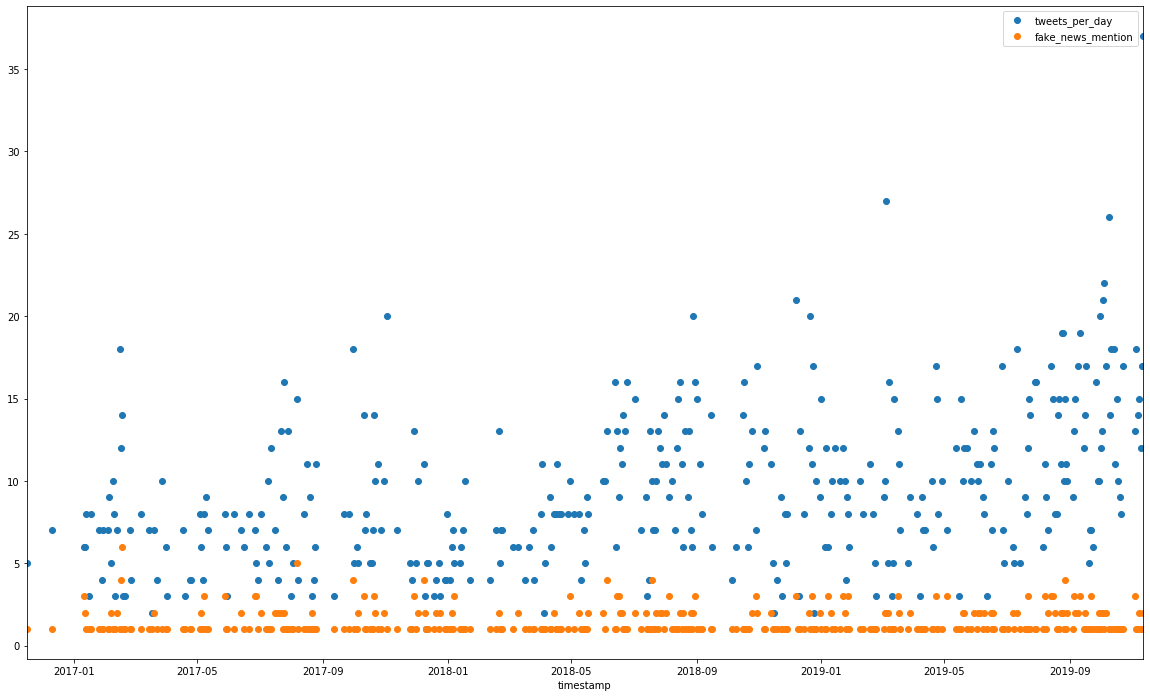

In [156]:
aggregate_tweets_day(trump, trump_days)

In [ ]:
# Frequency Trump mentiones 'fake news' in his tweets
res = (pd.Series(fake_news.index[1:]) - pd.Series(fake_news.index[:-1])).value_counts()
print('Average frequency for tweets mentioning fake news is: {} days '.format(res.mean()))

In [ ]:
plt.boxplot(res)

In [ ]:
plt.plot(trump_days.index, trump_days.label, 'o', alpha = 0.3);

In [ ]:
plt.plot(fake_news.index, fake_news.days, 'o', alpha = 0.3);	